In [125]:
print("Task 3 ML  - B Karthik ")

Task 3 ML  - B Karthik 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
import seaborn as sns

In [4]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import keras

In [5]:
from tensorflow.keras.layers import Dense,Dropout
from utils import *
from sklearn.neural_network import MLPClassifier

In [6]:
df = pd.read_csv(r"C:\Users\Karthi\Downloads\archive (6)\IRIS.csv")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

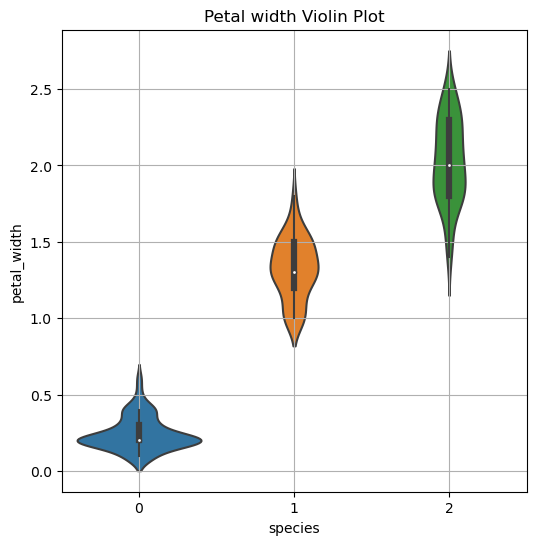

In [70]:
plt.figure(figsize=(6,6))
sns.violinplot(x='species', y='petal_width', data=df)
plt.title("Petal width Violin Plot")
plt.grid()
plt.show()

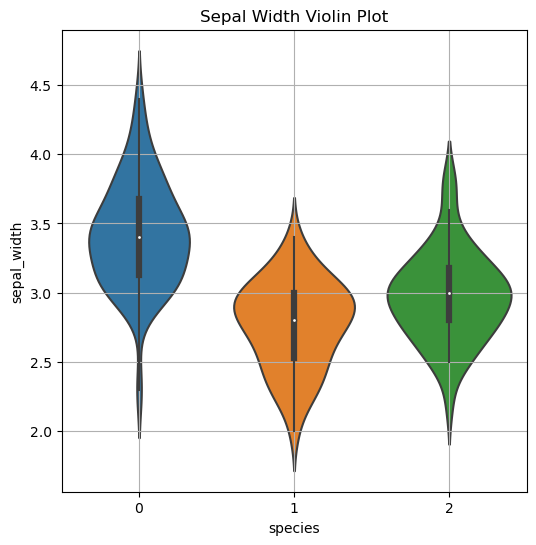

In [71]:
plt.figure(figsize=(6,6))
sns.violinplot(x='species', y='sepal_width', data=df)
plt.title("Sepal Width Violin Plot")
plt.grid()
plt.show()

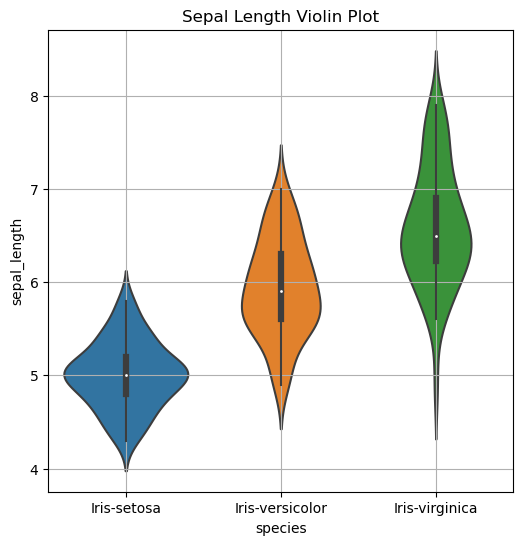

In [10]:
plt.figure(figsize=(6,6))
sns.violinplot(x='species', y='sepal_length', data=df)
plt.title("Sepal Length Violin Plot")
plt.grid()
plt.show()

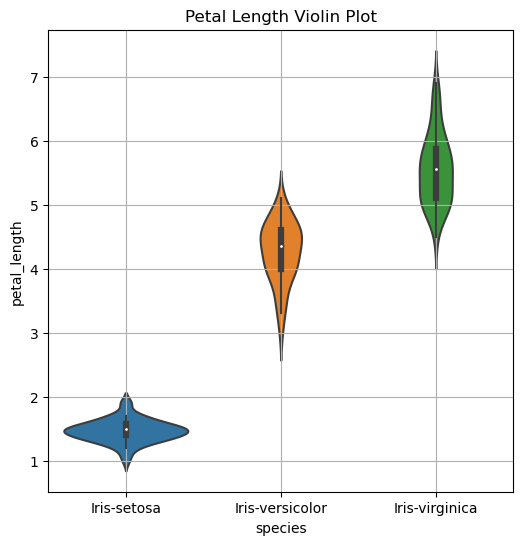

In [11]:
plt.figure(figsize=(6,6))
sns.violinplot(x='species', y='petal_length', data=df)
plt.title("Petal Length Violin Plot")
plt.grid()
plt.show()

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
print("Dimensions of the dataset:",df.shape)

Dimensions of the dataset: (150, 5)


In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
names = le.classes_
print(names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [18]:
x =  df.drop('species', axis=1)
y = df['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y[:3]

0    0
1    0
2    0
Name: species, dtype: int32

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle =  True, random_state=42)

In [37]:
print("X_train shape:",x_train.shape)
print("X_test shape:",x_test.shape)

X_train shape: (105, 4)
X_test shape: (45, 4)


In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
y_train = keras.utils.to_categorical(y_train,num_classes=3)
print(y_train[:3])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [40]:
model = Sequential([
    Dense(28,input_shape = (4,),activation = "relu"),
    Dense(32,activation = "relu"),
    Dropout(0.5),
    Dense(3,activation = "softmax"),
])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28)                140       
                                                                 
 dense_4 (Dense)             (None, 32)                928       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1167 (4.56 KB)
Trainable params: 1167 (4.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.fit(x_train,y_train,epochs= 100, verbose=2) 

Epoch 1/100


4/4 - 4s - loss: 1.0105 - accuracy: 0.4667 - 4s/epoch - 1s/step
Epoch 2/100
4/4 - 0s - loss: 0.9934 - accuracy: 0.4381 - 47ms/epoch - 12ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9858 - accuracy: 0.4952 - 29ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9454 - accuracy: 0.5429 - 33ms/epoch - 8ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9264 - accuracy: 0.5524 - 24ms/epoch - 6ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9061 - accuracy: 0.6095 - 23ms/epoch - 6ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8645 - accuracy: 0.6381 - 21ms/epoch - 5ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8402 - accuracy: 0.6571 - 25ms/epoch - 6ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8232 - accuracy: 0.6857 - 24ms/epoch - 6ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8357 - accuracy: 0.6571 - 24ms/epoch - 6ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7785 - accuracy: 0.7333 - 22ms/epoch - 5ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7529 - accuracy: 0.7429 - 22ms/epoch - 6ms/step
Epoch 13/100
4/4 - 0s - loss: 0.7380 - accuracy: 

In [45]:
prediction = model.predict(x_test)

2/2 [==============================] - 0s 10ms/step


In [48]:
import numpy as np
prediction = np.argmax(prediction,axis=-1)

In [114]:
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score, f1_score
print("Tensor flow Model's accuracy score:-",accuracy_score(y_test, prediction))

Tensor flow Model's accuracy score:- 1.0


In [50]:
cm = confusion_matrix(y_test,prediction)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [51]:
import seaborn as sns

In [52]:
df1 = pd.DataFrame({'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})

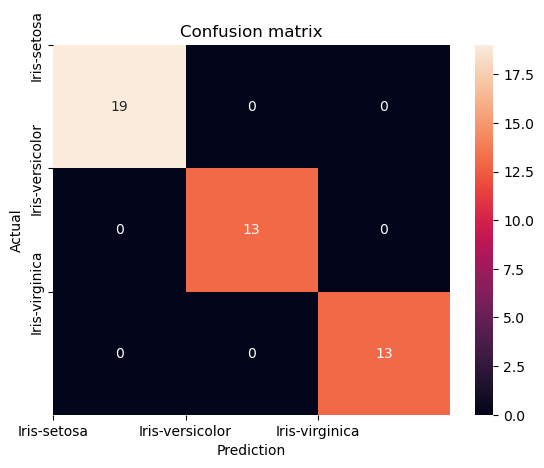

In [53]:
ax = sns.heatmap(cm,annot=True,fmt="d")
ax.set_xticks(np.arange(len(df1["species"])))
ax.set_xticklabels(df1["species"])
ax.set_yticks(np.arange(len(df1["species"])))
ax.set_yticklabels(df1["species"])
plt.title("Confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [54]:
f1_per_class = f1_score(y_test, prediction, average=None)
print("F1 score per class:", f1_per_class)

F1 score per class: [1. 1. 1.]


In [55]:
precision_per_class = precision_score(y_test, prediction, average=None)
print("Precision per class:", precision_per_class)

Precision per class: [1. 1. 1.]


In [72]:
from sklearn.metrics import classification_report

In [121]:
mlp_model = MLPClassifier(hidden_layer_sizes=(5), max_iter=500,random_state=42)
mlp_model.fit(x_train, y_train)
mlp_predictions = mlp_model.predict(x_test)

C:\Users\Karthi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [122]:
print("MLP Classifier Results:")
print("Classification Report:\n", classification_report(y_test1, mlp_predictions))

MLP Classifier Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.31      0.47        13
           2       0.87      1.00      0.93        13

   micro avg       0.95      0.80      0.87        45
   macro avg       0.96      0.77      0.80        45
weighted avg       0.96      0.80      0.83        45
 samples avg       0.80      0.80      0.80        45



C:\Users\Karthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
print("Tensor flow Model's accuracy:-",accuracy_score(y_test, prediction))
print("MLp's Accuracy:", accuracy_score(y_test1, mlp_predictions))

Tensor flow Model's accuracy:- 1.0
MLp's Accuracy: 0.8


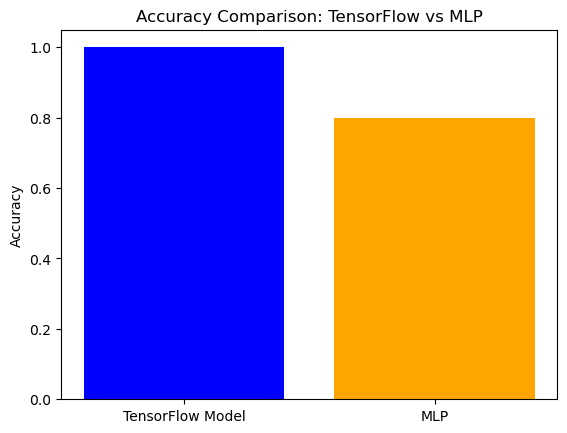

In [124]:
labels = ['TensorFlow Model', 'MLP']
tf_accuracy = accuracy_score(y_test, prediction)
mlp_accuracy = accuracy_score(y_test1, mlp_predictions)
accuracies = [tf_accuracy, mlp_accuracy]
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: TensorFlow vs MLP')
plt.show()